# Import and get mnist datasets

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras import datasets
(train_x, train_y), (test_x,test_y) =  datasets.mnist.load_data()

In [3]:
image = train_x[0]

> Should always check for shape

In [4]:
image.shape

(28, 28)

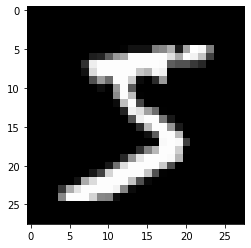

In [5]:
plt.imshow(image, 'gray')

In [6]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Feature Extraction

## Convolution 
- filters :
- kernel_size : filter size
- strides : how many pixels to skip 
- padding : zero, valid, same
- activation : Can add layer if to do so

In [12]:
tf.keras.layers.Conv2D(filters =3, kernel_size = (3,3), strides = (1,1), padding ='SAME', activation = 'relu')

In [13]:
tf.keras.layers.Conv2D(3,3,1,'SAME')

## Visualization
- tf.keras.layers.Conv2D

In [14]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [22]:
layer = tf.keras.layers.Conv2D(5,3,1,padding= 'SAME')
layer

In [23]:
output = layer(image)

In [32]:
import numpy as np

In [33]:
np.min(image), np.max(image)

(0.0, 255.0)

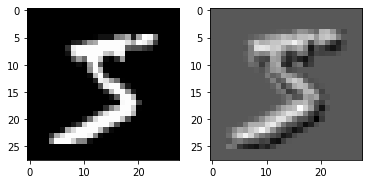

In [27]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2,)
plt.imshow(output[0,:,:,0], 'gray')
plt.show()

### Weights
- layer.get_weights()

In [34]:
weight = layer.get_weights()

> len(weight) = 2 the first is weight , the other is bias

In [37]:
len(weight)

2

In [38]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

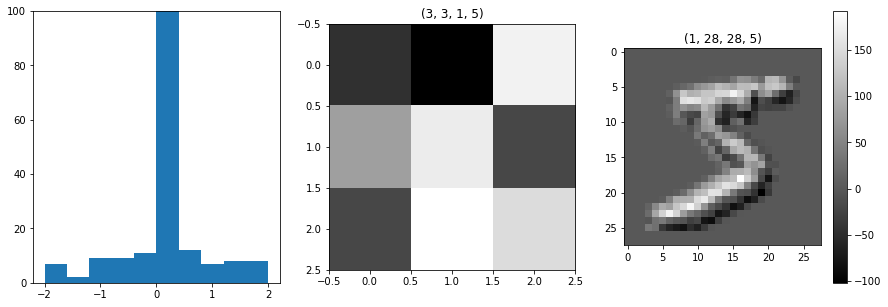

In [58]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range = [-2,2])
plt.ylim(0,100)

plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')

plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')

plt.colorbar()
plt.show()

## Activation function
- Relu : Basically kills every value that is under 0

In [59]:
np.min(output), np.max(output)

(-120.62239, 191.89415)

In [60]:
tf.keras.layers.ReLU()

In [62]:
act_layer= tf.keras.layers.ReLU()
act_output= act_layer(output)

In [63]:
act_output

<tf.Tensor: id=102, shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
       

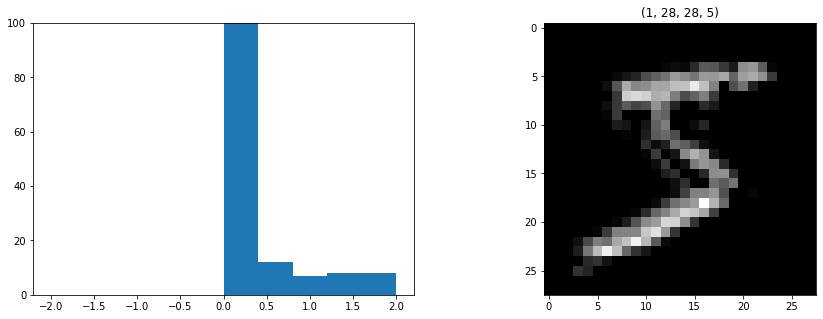

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range = [-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0], 'gray')
plt.show()

## Pooling

In [75]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [80]:
pool_output = pool_layer(act_output)

In [81]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [82]:
pool_output.shape

TensorShape([1, 14, 14, 5])

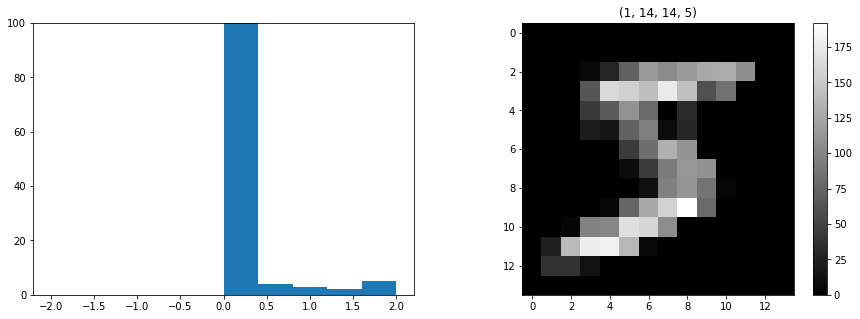

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range= [-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

## Fully Connected

In [90]:
f_layer = tf.keras.layers.Flatten()

In [91]:
flatten = f_layer(output)

In [93]:
flatten.shape

TensorShape([1, 3920])

<function matplotlib.pyplot.show(*args, **kw)>

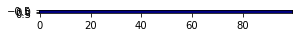

In [98]:
plt.figure(figsize = (10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.ylim(0,100)

plt.subplot(222)
plt.imshow(flatten[:,:100],'jet')
plt.show

## Dense
- tf.keras.layers.Dense

Basically Connects all other

In [100]:
d_layer = tf.keras.layers.Dense(32, activation='relu')

In [101]:
output = d_layer(flatten)

In [102]:
output.shape

TensorShape([1, 32])

In [103]:
layer2 = tf.keras.layers.Dense(10, activation = 'relu')
output_ex = layer2(output)
output_ex.shape

TensorShape([1, 10])

## Dropout  
<br>
- tf.keras.layers.Dropout  

Prevent Overfitting 

In [105]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [106]:
output.shape

TensorShape([1, 32])

## Build Model


In [111]:
from tensorflow.keras import layers

In [112]:
input_shape = (28,28,1)
num_classes = 10

In [ ]:
layers.Conv2D

In [117]:
inputs = layers.Input(shape = input_shape)

In [125]:
# 1st block - Feature extraction
net = layers.Conv2D(32,3, padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

# 2nd block 
net = layers.Conv2D(64,3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dense(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'Basic_CNN')

In [126]:
model

In [128]:
# None is the batch_size
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0 